In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("resources/sportsref_download.csv")

In [4]:
data.head()

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,Trey Adams,OL,Washington,College Stats,8-Jun,318,5.60,24.5,NaN,92.0,NaN,NaN,NaN
1,Hakeem Adeniji,OL,Kansas,College Stats,4-Jun,302,5.17,34.0,26.0,115.0,NaN,NaN,NaN
2,McTelvin Agim,DL,Arkansas,College Stats,3-Jun,309,4.98,NaN,27.0,NaN,NaN,NaN,NaN
3,Salvon Ahmed,RB,Washington,College Stats,11-May,197,4.62,34.5,NaN,120.0,NaN,NaN,NaN
4,Brandon Aiyuk,WR,Arizona State,College Stats,Jun-00,205,4.50,40.0,11.0,128.0,NaN,NaN,NaN


## Looks like we have a god amount od data missing here. The assumption is that some players did not part take in some events. We will remove the Drafted column since there is too much data missing there.

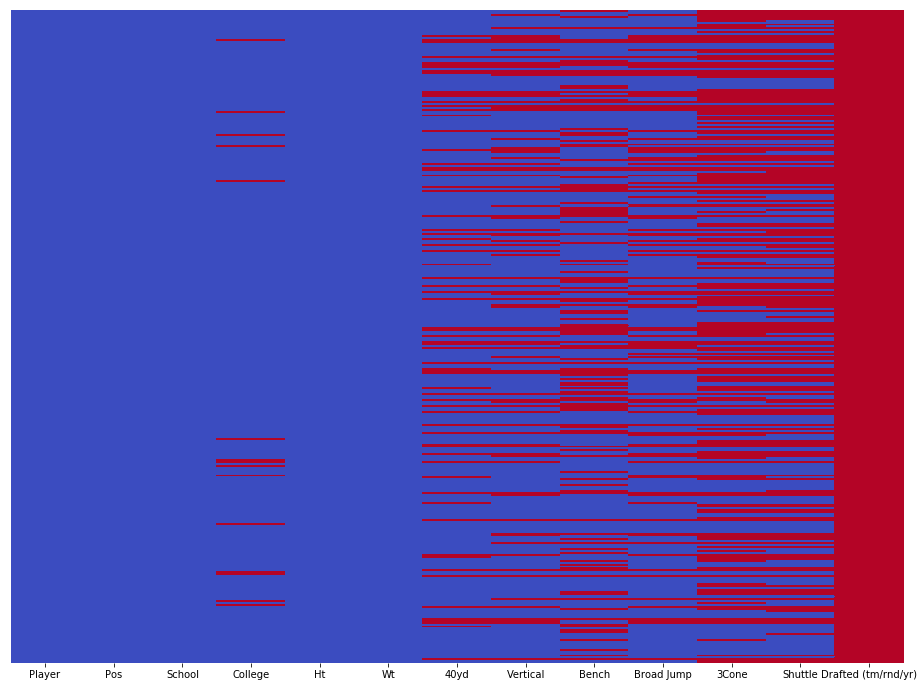

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

In [9]:
data.columns

Index(['Player', 'Pos', 'School', 'College', 'Ht', 'Wt', '40yd', 'Vertical',
       'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'Drafted (tm/rnd/yr)'],
      dtype='object')

In [10]:
data.drop('Drafted (tm/rnd/yr)', axis=1, inplace=True )

### We will replace all null values with 0.0 to properly. We will also need to fix the Height data for each player to be a numerical value in inches

In [13]:
data.replace(np.nan, 0.0, inplace=True)

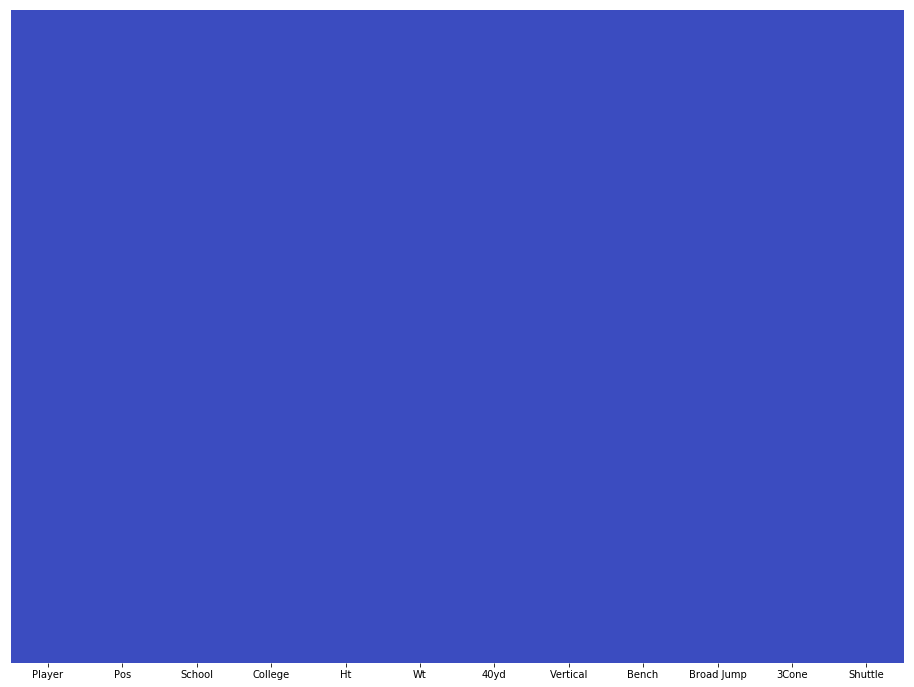

In [14]:
plt.figure(figsize=(16,12))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

In [16]:
data.head()

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
0,Trey Adams,OL,Washington,College Stats,8-Jun,318,5.60,24.5,0.0,92.0,0.0,0.0
1,Hakeem Adeniji,OL,Kansas,College Stats,4-Jun,302,5.17,34.0,26.0,115.0,0.0,0.0
2,McTelvin Agim,DL,Arkansas,College Stats,3-Jun,309,4.98,0.0,27.0,0.0,0.0,0.0
3,Salvon Ahmed,RB,Washington,College Stats,11-May,197,4.62,34.5,0.0,120.0,0.0,0.0
4,Brandon Aiyuk,WR,Arizona State,College Stats,Jun-00,205,4.50,40.0,11.0,128.0,0.0,0.0


## LSU leads in the amount of players drafted in 2020 with 16 total

In [36]:
school_count = data.groupby("School").count().sort_values("Player", ascending = False).head(10)

In [37]:
school_count

,Player,Pos,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
School,,,,,,,,,,,
LSU,16,16,16,16,16,16,16,16,16,16,16
Ohio St.,11,11,11,11,11,11,11,11,11,11,11
Michigan,11,11,11,11,11,11,11,11,11,11,11
Georgia,10,10,10,10,10,10,10,10,10,10,10
Alabama,10,10,10,10,10,10,10,10,10,10,10
Auburn,9,9,9,9,9,9,9,9,9,9,9
Notre Dame,9,9,9,9,9,9,9,9,9,9,9
Utah,9,9,9,9,9,9,9,9,9,9,9
Miami,8,8,8,8,8,8,8,8,8,8,8


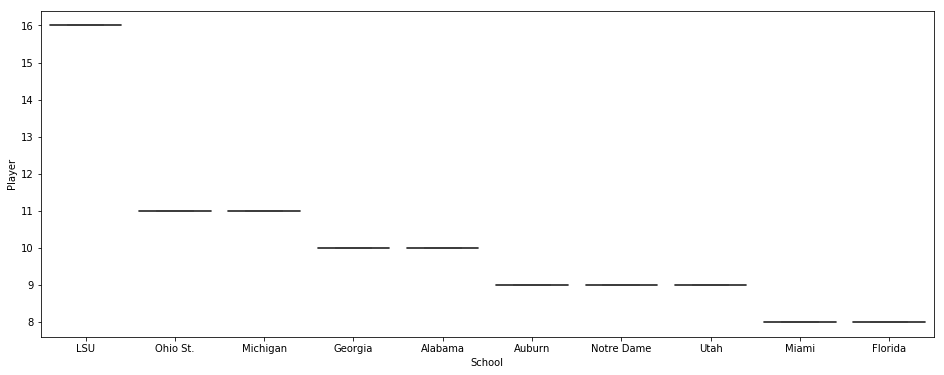

In [39]:
plt.figure(figsize=(16,6))
sns.boxplot(x = school_count.index, y= "Player", data=school_count)

In [29]:
count_positions = data.groupby("Pos").count().sort_values("Player", ascending = False)
count_positions

,Player,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
Pos,,,,,,,,,,,
WR,55,55,55,55,55,55,55,55,55,55,55
OL,52,52,52,52,52,52,52,52,52,52,52
DL,46,46,46,46,46,46,46,46,46,46,46
LB,44,44,44,44,44,44,44,44,44,44,44
CB,35,35,35,35,35,35,35,35,35,35,35
RB,30,30,30,30,30,30,30,30,30,30,30
S,26,26,26,26,26,26,26,26,26,26,26
TE,20,20,20,20,20,20,20,20,20,20,20
QB,17,17,17,17,17,17,17,17,17,17,17


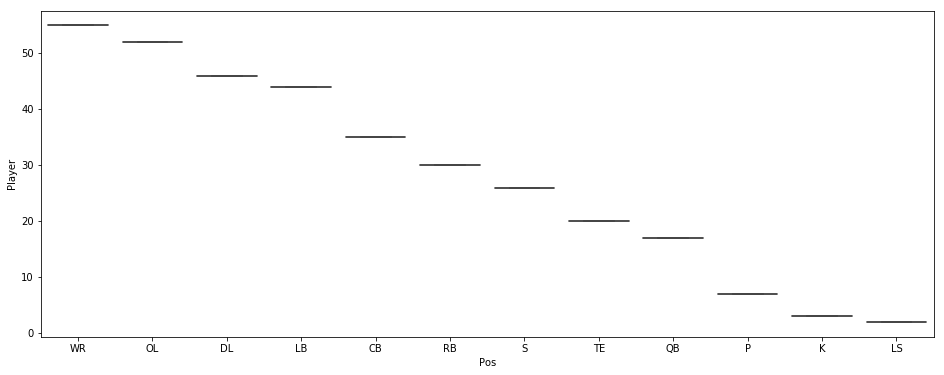

In [31]:
plt.figure(figsize=(16,6))
sns.boxplot(x = count_positions.index, y = "Player", data=count_positions)

## Top 10 verticals- WR

In [47]:
data[data["Pos"] == "WR"].sort_values("Vertical", ascending = False).head(10)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
242,Donovan Peoples-Jones,WR,Michigan,College Stats,2-Jun,212,4.48,44.5,0.0,139.0,0.00,0.00
155,Henry Ruggs III,WR,Alabama,College Stats,11-May,188,4.27,42.0,0.0,131.0,0.00,0.00
257,Jalen Reagor,WR,TCU,College Stats,11-May,206,4.47,42.0,17.0,138.0,7.31,4.46
55,Chase Claypool,WR,Notre Dame,College Stats,4-Jun,238,4.42,40.5,19.0,126.0,0.00,0.00
4,Brandon Aiyuk,WR,Arizona State,College Stats,Jun-00,205,4.50,40.0,11.0,128.0,0.00,0.00
100,Chris Finke,WR,Notre Dame,College Stats,9-May,186,4.57,40.0,7.0,0.0,0.00,0.00
58,Tyrie Cleveland,WR,Florida,College Stats,2-Jun,209,4.46,39.5,13.0,126.0,0.00,0.00
212,Denzel Mims,WR,Baylor,College Stats,3-Jun,207,4.38,38.5,16.0,131.0,6.66,4.43
140,John Hightower,WR,Boise St.,College Stats,1-Jun,189,4.43,38.5,0.0,122.0,7.07,4.21
48,Quintez Cephus,WR,Wisconsin,College Stats,1-Jun,202,4.73,38.5,23.0,124.0,7.20,4.33


### Top 40 yd dash - WR

In [50]:
data[(data["Pos"] == "WR") & (data["40yd"] > 0)].sort_values("40yd", ascending = True).head(10)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
155,Henry Ruggs III,WR,Alabama,College Stats,11-May,188,4.27,42.0,0.0,131.0,0.00,0.00
317,Quez Watkins,WR,Southern Miss,College Stats,Jun-00,185,4.35,36.5,0.0,125.0,7.28,4.36
212,Denzel Mims,WR,Baylor,College Stats,3-Jun,207,4.38,38.5,16.0,131.0,6.66,4.43
216,Darnell Mooney,WR,Tulane,College Stats,10-May,176,4.38,37.0,9.0,124.0,0.00,0.00
90,Devin Duvernay,WR,Texas,College Stats,10-May,200,4.39,35.5,0.0,123.0,7.13,4.20
111,Antonio Gibson,WR,Memphis,College Stats,Jun-00,228,4.39,35.0,16.0,118.0,0.00,0.00
55,Chase Claypool,WR,Notre Dame,College Stats,4-Jun,238,4.42,40.5,19.0,126.0,0.00,0.00
163,Justin Jefferson,WR,LSU,College Stats,1-Jun,202,4.43,37.5,0.0,126.0,0.00,0.00
140,John Hightower,WR,Boise St.,College Stats,1-Jun,189,4.43,38.5,0.0,122.0,7.07,4.21
167,Jerry Jeudy,WR,Alabama,College Stats,1-Jun,193,4.45,35.0,0.0,120.0,0.00,4.53


## Top 10 Bench -WR

In [53]:
data[(data["Pos"] == "WR") & (data["Bench"] > 0)].sort_values("Bench", ascending = False).head(10)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
48,Quintez Cephus,WR,Wisconsin,College Stats,1-Jun,202,4.73,38.5,23.0,124.0,7.20,4.33
108,Antonio Gandy-Golden,WR,Liberty,College Stats,4-Jun,223,4.60,36.0,22.0,127.0,7.33,4.55
259,Joe Reed,WR,Virginia,College Stats,Jun-00,224,4.47,38.0,21.0,123.0,0.00,0.00
254,James Proche,WR,SMU,College Stats,11-May,201,0.00,34.5,20.0,0.0,7.27,4.40
55,Chase Claypool,WR,Notre Dame,College Stats,4-Jun,238,4.42,40.5,19.0,126.0,0.00,0.00
234,K.J. Osborn,WR,Miami,College Stats,11-May,203,4.48,37.5,18.0,123.0,7.00,4.35
257,Jalen Reagor,WR,TCU,College Stats,11-May,206,4.47,42.0,17.0,138.0,7.31,4.46
266,Kendrick Rogers,WR,Texas A&M,College Stats,4-Jun,208,4.51,35.5,17.0,124.0,7.13,4.48
168,Collin Johnson,WR,Texas,College Stats,6-Jun,222,0.00,0.0,17.0,0.0,0.00,0.00
179,Laviska Shenault Jr.,WR,Colorado,College Stats,1-Jun,227,4.58,0.0,17.0,0.0,0.00,0.00


## Top 10 Shuttle Drills -WR

In [55]:
data[(data["Pos"] == "WR") & (data["Shuttle"] > 0)].sort_values("Shuttle", ascending = True).head(10)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
144,Isaiah Hodgins,WR,Oregon St.,College Stats,4-Jun,210,4.61,36.5,9.0,124.0,7.01,4.12
252,Michael Pittman,WR,USC,College Stats,4-Jun,223,4.52,36.5,13.0,121.0,6.96,4.14
90,Devin Duvernay,WR,Texas,College Stats,10-May,200,4.39,35.5,0.0,123.0,7.13,4.20
140,John Hightower,WR,Boise St.,College Stats,1-Jun,189,4.43,38.5,0.0,122.0,7.07,4.21
235,Aaron Parker,WR,Rhode Island,0,2-Jun,209,4.57,26.5,12.0,112.0,6.94,4.23
287,Freddie Swain,WR,Florida,College Stats,Jun-00,197,4.46,36.5,16.0,124.0,7.05,4.26
36,Tony Brown,WR,Colorado,College Stats,1-Jun,198,4.65,33.5,14.0,119.0,7.21,4.27
244,Malcolm Perry,WR,Navy,College Stats,9-May,186,4.63,36.0,10.0,122.0,7.12,4.31
48,Quintez Cephus,WR,Wisconsin,College Stats,1-Jun,202,4.73,38.5,23.0,124.0,7.20,4.33
234,K.J. Osborn,WR,Miami,College Stats,11-May,203,4.48,37.5,18.0,123.0,7.00,4.35
